In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import pandas as pd

import deep_fib
import utils


In [4]:
train, test = utils.data.get_train_test_split(0.01, 42)
dataset = utils.data.Marconi100Dataset(test, normalize=True)


100%|██████████| 3/3 [00:00<00:00, 10.53it/s]


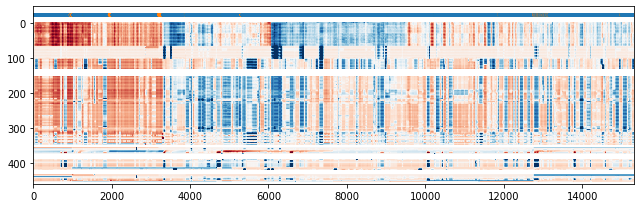

In [30]:
hpcsv, labels = dataset[1]
tmp = pd.Series(labels.values, index=list(range(len(labels))))
utils.nn.plot_dataframe(hpcsv, tmp)


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = deep_fib.sci_net.SCINet(
    output_len=40,
    input_len=40,
    cfg=deep_fib.sci_net.SCIBlockCfg(
        input_dim=10,
        hidden_size=1,
        groups=1,
        kernel_size=3,
        dropout=0.5,
        modified=True,
    ),
    num_stacks=1,
    concat_len=0,
    num_levels=2,
    single_step_output_One=False,
    positional_encoding=True,
    RIN=True
).to(device)
x = torch.randn(32, 40, 10, device=device)
y = model(x)
print(y.shape)


torch.Size([32, 40, 10])
